# KNN - K-nearest neighbors

Nessa aula, iremos tratar dos seguintes conteúdos:
- KNN - Classificador;
- KNN - Regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## K-Nearest Neighbors ou K-Vizinhos

O modelo K-Nearest Neighbors (KNN), ou K-Vizinhos, é um modelo de classificação bem simples, cuja ideia de aplicação é: iremos definir se um dado pertence ou não a uma classe - ou no caso multi classes para qual das classes irá pertencer -, a partir de cálculos de **distâncias!** <br><br>

A cada observação nova que devemos classificar, será feito o cálculo de distância das $K$ observações mais próximas em relação ao elemento a ser classificado e, de acordo com a classificação desses vizinhos próximos, será definida a classe da observação: 

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

É importante ressaltar que o modelo KNN é **bem simples** de rodar e tem um **custo computacional mais baixo** em relação a outros modelos. Entretanto, **ele não aprende** com os dados já observados, ou seja: toda vez que tivermos novos dados, serão calculadas todas as ditâncias para definir os elementos mais próximos e, assim, conseguir classificá-lo.<br><br>

Existem vários tipos de distâncias que podemos utilizar no KNN; por exemplo: [Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), [Cosseno](https://cmry.github.io/notes/euclidean-v-cosine) e [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).<br><br>

A distância Euclidiana é a que geralmente estamos mais habituados; é aquela a qual costumamos atribuir o sentido de "distância em linha reta". A figura abaixo ilustra o cálculo para a distância Euclidiana entre dois pontos quaisquer em um espaço x-y (podemos pensar nesses pontos, por exemplo, como correspondendo a duas observações distintas de um vetor de atributos).

<img src="https://rosalind.info/media/Euclidean_distance.png" width=300>

Em suma, o processo de modelagem para o KNN engloba usualmente as seguintes etapas:

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) a cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, em ordem decrescente;
4. Verifica a classe de cada uma das *K* observações que tiveram a menor distância, e conta a quantidade correspondente a cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

Mas sempre que olhamos para o nosso processo de modelagem (como o exemplo acima), a primeira dúvida que vem na cabeça é:

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

### Exemplo com um dataset fictício

Vamos trabalhar com um conjunto de dados simulado, com 300 observações divididas em três classes de dados, e uma matriz de atributos bidimensional (i.e., dois atributos).

In [1]:
n_exemplos = 300
centroides = [(-2,2), (0,2), (0,-1)]

In [2]:
import sklearn.datasets as skdata

X, y = skdata.make_blobs(n_samples = n_exemplos,
                        n_features = 2,
                        cluster_std = 1.0,
                        centers = centroides,
                        shuffle = False,
                        random_state = 42)

In [3]:
print(X)

[[-1.50328585e+00  1.86173570e+00]
 [-1.35231146e+00  3.52302986e+00]
 [-2.23415337e+00  1.76586304e+00]
 [-4.20787184e-01  2.76743473e+00]
 [-2.46947439e+00  2.54256004e+00]
 [-2.46341769e+00  1.53427025e+00]
 [-1.75803773e+00  8.67197553e-02]
 [-3.72491783e+00  1.43771247e+00]
 [-3.01283112e+00  2.31424733e+00]
 [-2.90802408e+00  5.87696299e-01]
 [-5.34351231e-01  1.77422370e+00]
 [-1.93247180e+00  5.75251814e-01]
 [-2.54438272e+00  2.11092259e+00]
 [-3.15099358e+00  2.37569802e+00]
 [-2.60063869e+00  1.70830625e+00]
 [-2.60170661e+00  3.85227818e+00]
 [-2.01349722e+00  9.42289071e-01]
 [-1.17745509e+00  7.79156350e-01]
 [-1.79113640e+00  4.03298761e-02]
 [-3.32818605e+00  2.19686124e+00]
 [-1.26153342e+00  2.17136828e+00]
 [-2.11564828e+00  1.69889630e+00]
 [-3.47852199e+00  1.28015579e+00]
 [-2.46063877e+00  3.05712223e+00]
 [-1.65638171e+00  2.36959845e-01]
 [-1.67591603e+00  1.61491772e+00]
 [-2.67692200e+00  2.61167629e+00]
 [-9.69000478e-01  2.93128012e+00]
 [-2.83921752e+00  1

Verifiquemos os labels atribuídos em 'y' e o número de observações em cada classe.

In [4]:
import numpy as np
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([100, 100, 100], dtype=int64))

Vamos, agora, graficar o espaço destes dados

[(-2, 2), (0, 2), (0, -1)]

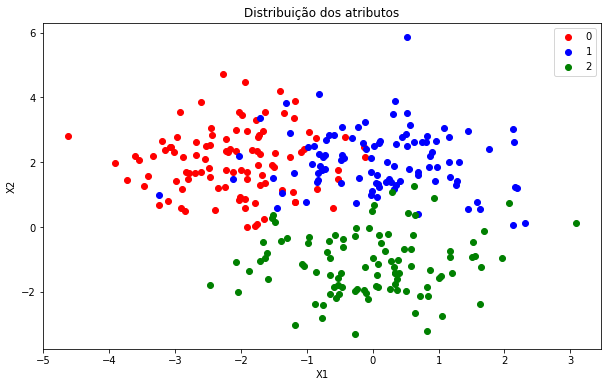

In [5]:
import matplotlib.pyplot as plt

# Definir vetor com as cores
colors = ['r', 'b', 'g']

# rótulos das classes de dados
class_labels = np.unique(y)

aux = 0
plt.figure(figsize = (10,6))

for c in class_labels:
    indices_to_plot = np.where(y == c)
    plt.scatter(X[indices_to_plot,0], X[indices_to_plot,1], color = colors[aux], label = c)
    aux += 1

plt.title('Distribuição dos atributos')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend([0,1,2])

[(-2,2), (0,2), (0,-1)]

Agora, vamos utilizar o algoritmo do KNN para visualizar **curvas de decisão** entre as três classes de dados. Estas curvas nos indicarão a que classe de dados uma nova amostra pertence, a partir de sua posição no espaço de fase gerado pelos atributos X1 e X2.

In [6]:
d = np.column_stack((X,np.transpose(y)))
print(d)

[[-1.50328585e+00  1.86173570e+00  0.00000000e+00]
 [-1.35231146e+00  3.52302986e+00  0.00000000e+00]
 [-2.23415337e+00  1.76586304e+00  0.00000000e+00]
 [-4.20787184e-01  2.76743473e+00  0.00000000e+00]
 [-2.46947439e+00  2.54256004e+00  0.00000000e+00]
 [-2.46341769e+00  1.53427025e+00  0.00000000e+00]
 [-1.75803773e+00  8.67197553e-02  0.00000000e+00]
 [-3.72491783e+00  1.43771247e+00  0.00000000e+00]
 [-3.01283112e+00  2.31424733e+00  0.00000000e+00]
 [-2.90802408e+00  5.87696299e-01  0.00000000e+00]
 [-5.34351231e-01  1.77422370e+00  0.00000000e+00]
 [-1.93247180e+00  5.75251814e-01  0.00000000e+00]
 [-2.54438272e+00  2.11092259e+00  0.00000000e+00]
 [-3.15099358e+00  2.37569802e+00  0.00000000e+00]
 [-2.60063869e+00  1.70830625e+00  0.00000000e+00]
 [-2.60170661e+00  3.85227818e+00  0.00000000e+00]
 [-2.01349722e+00  9.42289071e-01  0.00000000e+00]
 [-1.17745509e+00  7.79156350e-01  0.00000000e+00]
 [-1.79113640e+00  4.03298761e-02  0.00000000e+00]
 [-3.32818605e+00  2.19686124e+

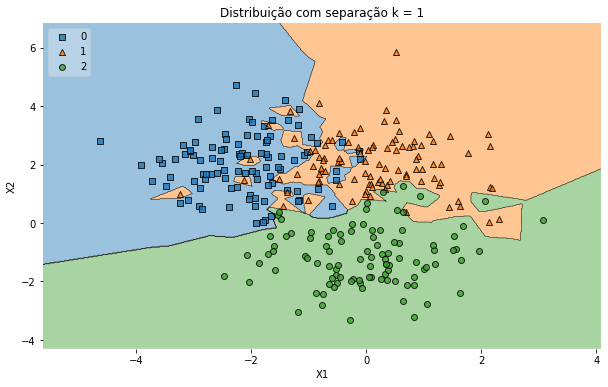

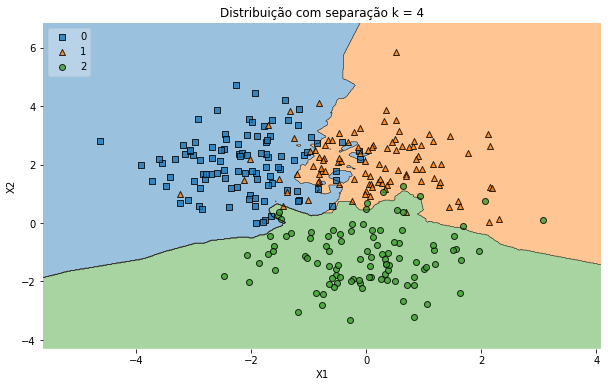

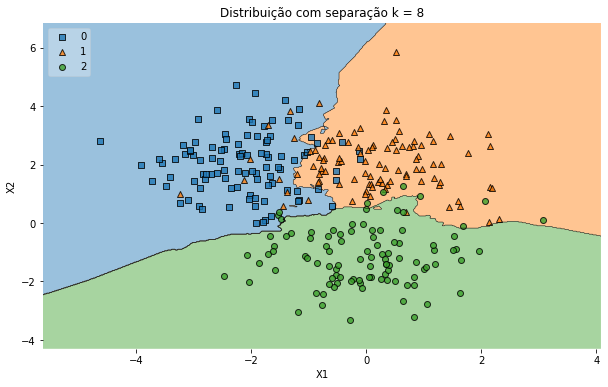

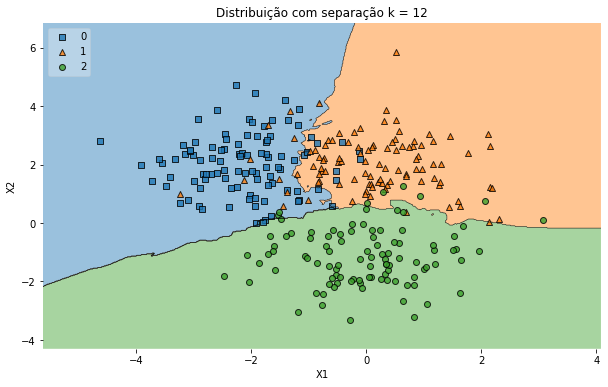

In [9]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from pandas import DataFrame

d = np.column_stack((X,np.transpose(y)))

# Montamos a matriz de atributos
data = DataFrame(data = d, columns = ['X1', 'X2', 'y'])
feature_names = ['X1', 'X2']

# mostra as regiões de separação para diversos valores de k
vk = [1, 4, 8, 12]

for k in vk:
    # modelo classificador KNN
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')

    # fit dos dados
    model.fit(X, y)

    # Desenhar as regiões de decisão
    plt.figure(figsize = (10,6))
    plot_decision_regions(X, y, clf = model, legend = 2)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Distribuição com separação k = {k}')

    plt.show()

Vale ressaltar a diferença nas superfícies de separação conforme variamos o valor de *k* a ser utilizado (veja, por exemplo, as proximidades do ponto (0,-2).

## Exemplo Prático

Passemos, agora, a um dataset contendo características para identificar câncer de mama.

In [11]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Lendo conjunto de dados

Como exemplo, vamos utilizar dados de Câncer de Mama, esses dados estão disponiveis também no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo site do [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). 

A ideia é que consigamos construir um modelo classificador entre câncer maligno e benigno.

In [19]:
# leia a base de "../datasets/breast_cancer.csv"

df = pd.read_csv("./datasets/breast_cancer.csv")

In [20]:
# explorando o dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.shape

(569, 32)

In [22]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [23]:
# drop da coluna de id
df = df.drop(columns = "id")

In [24]:
# dataframe sem coluna 'id'
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Análise exploratória

Mapa de correlação

<AxesSubplot:>

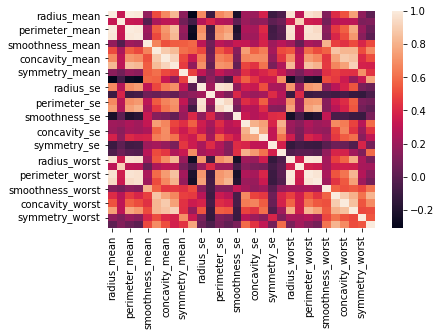

In [25]:
sns.heatmap(df.corr())

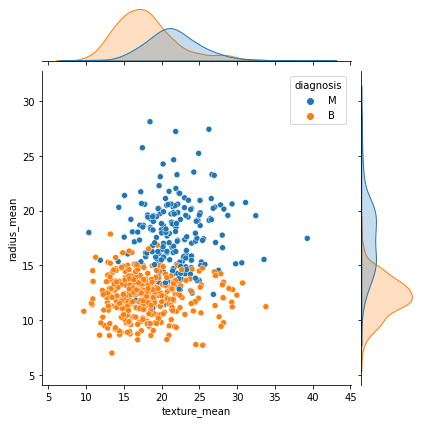

In [26]:
# visualizando a relação entre as colnas x='texture_mean' e y='radius_mean'
sns.jointplot(data = df, x = 'texture_mean', y = 'radius_mean', hue = 'diagnosis')

Uma pergunta é muitíssimo importante:

In [27]:
# os dados são balanceados com relação ao target?
df["diagnosis"].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [28]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Apesar de termos dados desbalanceados, neste caso, não temos uma única classe muito predominante (>80-90% dos dados), de modo que o desbalanceamento não é um grande agravante. Então continuaremos a usar os dados sem grandes tratamentos, mas no percorrer do curso aprenderemos algumas técnicas para lidar com dados desbalanceados.

Vamos separar os dados em treinamento e teste.

In [29]:
X = df.drop(columns = "diagnosis")
y = df['diagnosis']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify = y)

Usando o *stratify* no *train_test_split* é uma das formas de lidarmos com dados desbalanceados. O objetivo de passarmos esse parâmetros é que na separação das bases, que seja mantido a proporcionalidade entre as classes:

In [31]:
y.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [32]:
y_train.value_counts(normalize = True)

B    0.628141
M    0.371859
Name: diagnosis, dtype: float64

In [33]:
y_test.value_counts(normalize = True)

B    0.625731
M    0.374269
Name: diagnosis, dtype: float64

#### Transformações dos Dados

Em alguns modelos de classificação, principalmente em modelos baseados em distâncias, é **sempre importante transformarmos nossos dados para escalas parecidas**. Isso é necessário pois dependendo da ordem de grandeza de cada um das variáveis isso pode influenciar nos cálculos do nosso modelo. As transformações mais comuns são [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) e [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler). Vamos utilizar o _StandardScaler_ a seguir.

A ideia da normalização do *StandardScaler* é subtrair, de cada observação, a média da distribuição, e dividir pelo desvio-padrão:

$z = \frac{x - \mu}{\sigma}$.

Isso normaliza a distribuição dos dados no sentido de mudar sua escala e a deixar com média 0 e desvio-padrão unitário (ao menos aproximadamente). Isso faz com que as distribuições fiquem mais diretamente comparáveis entre si.

<img src="https://miro.medium.com/max/992/1*dZlwWGNhFco5bmpfwYyLCQ.png" width=500>

Já o *MinMaxScaler* normaliza os valores para que o resultado fique compreendido, por padrão, no intervalo [0,1] (este intervalo pode ser especificado como entrada da função), conforme ilustrado na figura abaixo. Neste caso, a normalização que fazemos é:

$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}.$

<img src="https://sofapirate.github.io/Plaquette/_images/Plaquette-MinMaxScaler.png" width=500>

#### Exemplo do processo com números quaisquer

In [34]:
import numpy as np
data = [[60, 2], [40, 2], [60, 4], [80, 2]]
a = np.array(data)

print(np.std(a, axis=0))

print(np.mean(a, axis=0))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

# um escore-z (ou escore padrão) de uma observação é o 
# número de desvios padrão acima 
#  ou abaixo da média da população
z = scaler.transform(data)
print(z)

[14.14213562  0.8660254 ]
[60.   2.5]
[[ 0.         -0.57735027]
 [-1.41421356 -0.57735027]
 [ 0.          1.73205081]
 [ 1.41421356 -0.57735027]]


In [35]:
(80 - 60) / 14.14213562

1.4142135627461903

In [36]:
(4 - 2.5) / 0.8660254

1.7320508151377547

#### Continuando com o *scaling* dos nossos dados:

In [38]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,...,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [39]:
from sklearn.preprocessing import StandardScaler 

In [40]:
# Scaling dos dados de treinamento
from sklearn.preprocessing import StandardScaler

# inicialização do scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

Vamos visualizar a distribuição de uma das features ('radius_mean'; a primeira coluna do dataset).

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

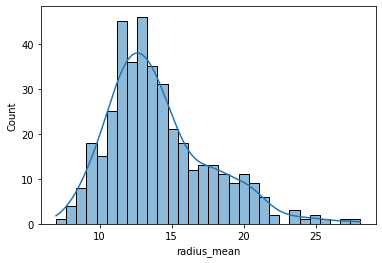

In [41]:
sns.histplot(X_train['radius_mean'], bins = 30, kde = True)

<AxesSubplot:ylabel='Count'>

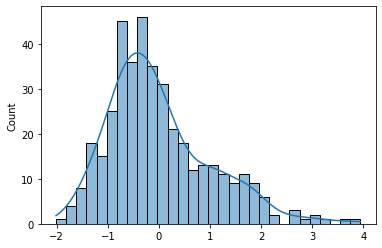

In [43]:
sns.histplot(X_train_scaled[:,0], bins = 30, kde = True)

Observamos que mantemos o formato original da distribuição, mas alteramos sua escala, **padronizando-a** em termos do número de vezes que a diferença entre os valores e a média da distribuição original são maiores, ou menores, que o desvio-padrão. Lembrando que diferenças negativas indicam valores menores que a média.

Vamos printar os valores da média e do desvio-padrão da distribuição na nova escala. Verificaremos que a média e o desvio-padrão deverão ser muito próximos, ou iguais, a zero, e um, respectivamente.

In [44]:
print(X_train_scaled[:,0].mean())
print(X_train_scaled[:,0].std())

4.4632081391966094e-17
1.0


In [45]:
# Scaling dos dados de teste
X_test_scaled = scaler.transform(X_test)

Agora vamos para o nosso processo padrão de instância, fit e predict para o modelo:<br>
Deixarei o link do Scikit-Learn para [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Faça a chamada do modelo
model = KNeighborsClassifier(n_neighbors = 8)

In [48]:
# Fit do modelo 
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
# Predict do modelo
y_pred = model.predict(X_test_scaled)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96       107
           M       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



Matriz de confusão

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

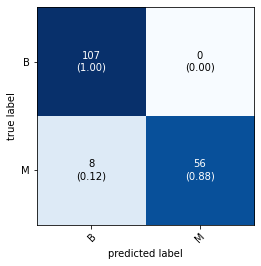

In [51]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ['B', 'M'])

### Definindo o valor de K vizinhos

No exemplo acima, elaboramos o classificador utilizando os 5 vizinhos mais próximos a cada observação. Mas e se quiséssemos tentar otimizar esta escolha? Como poderíamos fazer?

Utilizando **validação cruzada**, vamos criar um looping e fazer uma varredura nos valor de K, para encontramos seu valor ideal.

In [52]:
# Substituímos os labels por valores numéricos
yy = (y_train == 'M')
y_train = yy.astype(int)
y_train

78     1
330    1
378    0
213    1
89     0
      ..
37     0
415    0
458    0
476    0
129    1
Name: diagnosis, Length: 398, dtype: int32

In [53]:
# Vamos construir uma função que plote os erros de treino e validação em função da escolha para 'k'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

def plot_validation_k(k_list, X, y):
    training_error = []
    validation_error = []
    
    # para cada 'k' possível
    for k in k_list:
        # cria novo modelo KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        
        # cross-validation folds
        kf5 = KFold(n_splits = 5, shuffle = True, random_state = 42)
        
        # cross-validation scores
        cv_scores = cross_validate(estimator = knn, X = X, y = y,
                                  scoring = 'neg_mean_absolute_error',
                                  cv = kf5, return_train_score = True)
        
        # colocamos o retorno da função acima nas listas de erros de treinamento e validação
        training_error.append(-1*np.mean(cv_scores['train_score']))
        validation_error.append(-1*np.mean(cv_scores['test_score']))
        
    plt.plot(k_list, training_error)
    plt.plot(k_list, validation_error)
    
    plt.title('Erros de treino e validação')
    plt.ylabel('Erro médio absoluto')
    plt.xlabel('K')
    plt.legend(['Treinamento', 'Validação'])
    plt.show()

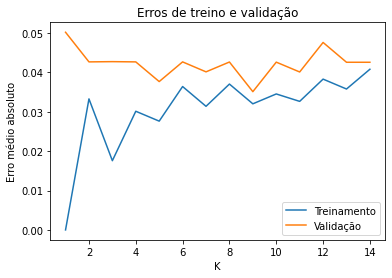

In [54]:
# Visualização do resultado
plot_validation_k(range(1,15), X_train_scaled, y_train)

### Exercicio
  
Utilizando a base de seguros, *'insurance.csv'*, responda aos exercícios propostos abaixo.

- __1)__ O dataset contém valores contínuos para a coluna *charges*, valor a ser cobrado pela seguradora. Como poderíamos definir valores discretos para enquadrar diferentes categorias de preço cobrado; por exemplo, definindo um valor a ser pago "baixo", "médio", ou "alto"? Siga sua proposta e adeque o dataset para que contenha um *target* neste formato, e imprima a proporção resultante de instâncias em cada classe.
- __2)__ Segmente o conjunto de dados em amostra de teste e treinamento, e defina o número ótimo de *k* para um classificador do tipo KNN que tente prever em qual das três classes definidas em (1) uma nova entrada será alocada. Não se esqueça de avaliar a necessidade de *scaling* dos dados.
- __3)__ Treine o modelo com o número ótimo de 'k' definido em (2), e obtenha o erro da predição.

#### Exercício 1

In [55]:
# Leitura do dataset
df = pd.read_csv('insurance.csv')

In [56]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:xlabel='charges', ylabel='Count'>

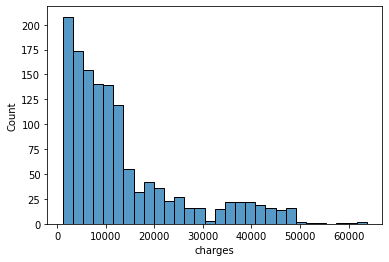

In [58]:
# histograma
sns.histplot(df['charges'])

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cstefano\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping de

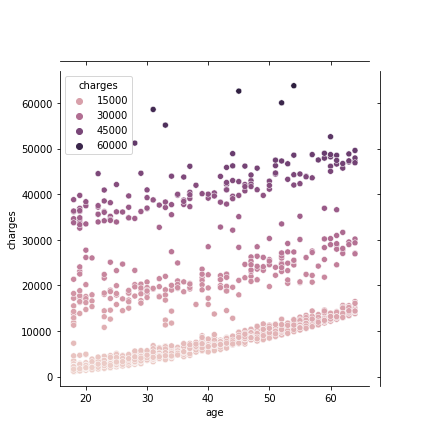

In [59]:
# jointplot entre idade e charges
sns.jointplot(data = df, x = 'age', y ='charges', hue = 'charges')

In [ ]:
# Definição de pontos de corte:

In [ ]:
# Criação de coluna com "target"


In [ ]:
# Proporção dos valores


#### Exercício 2

In [ ]:
# Leitura do dataset
df = pd.read_csv('dados_modelo/insurance.csv')

df.info()

df['charges'].hist()

# jointplot entre idade e charges
sns.set_theme()
sns.jointplot(x=df['charges'], y=df['age']);

# Definição de pontos de corte:
def pontos_de_corte(df):
    for valor in df:
        if valor >= 30000:
            yield 'high'
        elif valor >= 15000:
            yield 'medium'
        else:
            yield 'low'

# Criação de coluna com "target"
df['target'] = ''
target  = pontos_de_corte(df['charges'])
for i in df.index:
    for j in target:
        df['target'].iloc[i] = j
        break

df.head()

# Proporção dos valores
df['target'].value_counts()

df['region'].value_counts()

df.info()

df['sex'] = np.where(df['sex'] == 'female', 1, 0)
df['smoker'] = np.where(df['smoker'] == 'yes', 1, 0)
df_dummies = pd.get_dummies(df, columns=['region'], drop_first=True)
df_dummies.head()

X = df_dummies.drop(columns=['target', 'charges'])
y=df['target']
df

# Separação das amostras
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.25, random_state=42)

# proporção dos valores em 'y'
y_train.value_counts()

# Como fica a matriz de atributos?
df.describe()

# Precisamos de scaling dos dados?
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.fit_transform(X_test)

df_temp = pd.concat([df], axis=1).corr()
sns.heatmap(df_temp, vmin=-1, annot=True)

model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train_sca, y_train)

y_pred = model.predict(X_test_sca)
y_pred

y_proba = model.predict_proba(X_test_sca)
pd.DataFrame(y_proba)

# matriz de confusão
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ['high', 'low', 'medium'])

In [ ]:
# Separação das amostras


In [ ]:
# proporção dos valores em 'y'

In [ ]:
# Como fica a matriz de atributos?


In [ ]:
# Precisamos de scaling dos dados?


In [ ]:
# Plot dos resultados


Definamos, assim, $k_{opt} = $.

#### Exercício 3

In [ ]:
# matriz de confusão

Podemos definir uma "acurácia média" a partir da proporção existente em cada classe, para termos uma ideia da performance do nosso modelo:

$A_{média} = \frac{}{}$;

$A_{média} = 0.$.